c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


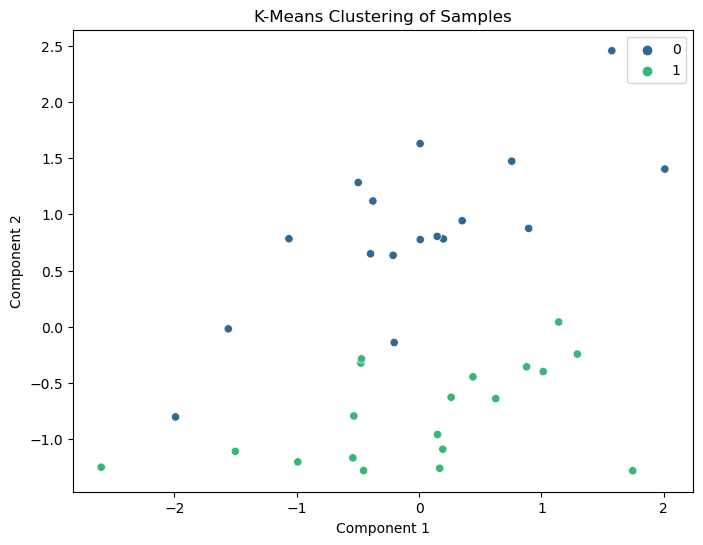

In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('./data/GSE135036_norm.csv')  # Your actual file
df.set_index('GeneId', inplace=True)

# Transpose so samples are rows
data = df.T

# Standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters, palette='viridis')
plt.title('K-Means Clustering of Samples')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


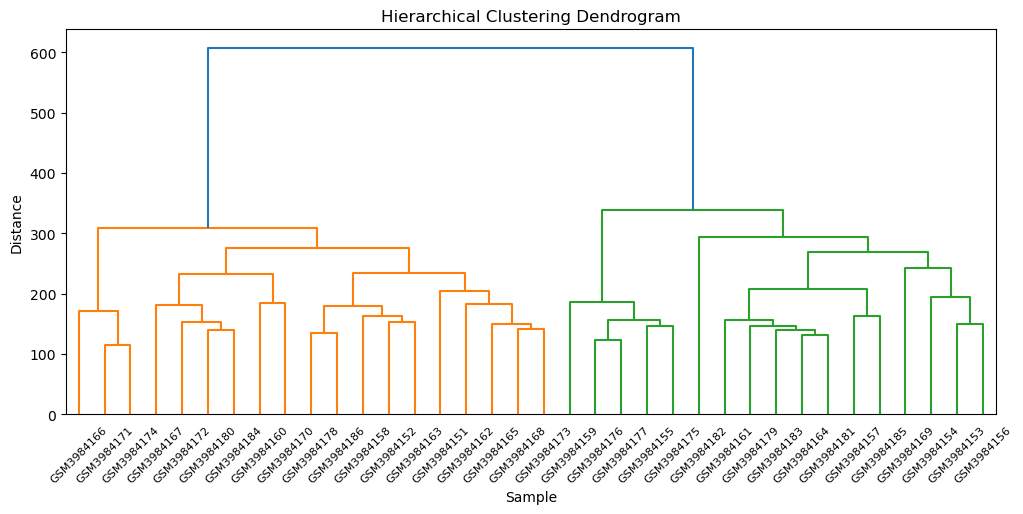

In [63]:
import scipy.cluster.hierarchy as sch

# Hierarchical clustering dendrogram
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'), labels=data.index.tolist())
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.show()


In [65]:
print(data.shape)  # Should show (36, number_of_genes)


(36, 23095)


In [66]:
#true_labels = [1] * 29 + [0] * 7  # 29 PD, 7 control
# Assuming last row is labels
labels = df.loc["disease"]  # or whatever you named it
labels = labels.astype(int).tolist()
true_labels=labels

In [67]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(true_labels, clusters)
print(f'Adjusted Rand Index: {ari:.2f}')


Adjusted Rand Index: 0.05


In [68]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(true_labels, clusters)
print(f'Adjusted Rand Index: {ari:.2f}')


Adjusted Rand Index: 0.05


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


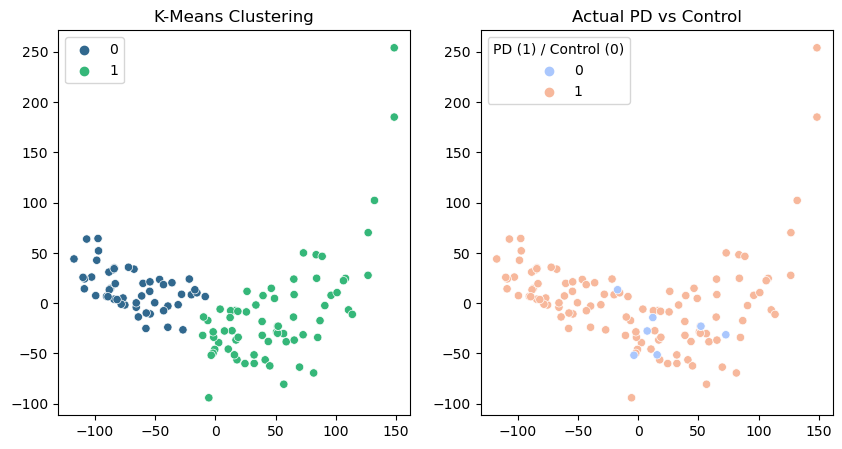

In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("./data/GSE205450_norm.csv")  # Replace with actual path
df.set_index("GeneId", inplace=True)

# Transpose: Samples as rows, Genes as columns
data = df.T

# Ground truth labels (assumption: last 7 are control)
true_labels = [1] * (len(data) - 7) + [0] * 7  # 1 = PD, 0 = Control

# Standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
predicted_clusters = kmeans.fit_predict(data_scaled)

# PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Plotting clusters and actual labels
plt.figure(figsize=(10,5))

# Plot predicted clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=predicted_clusters, palette='viridis')
plt.title("K-Means Clustering")

# Plot ground truth
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=true_labels, palette='coolwarm')
plt.title("Actual PD vs Control")
plt.legend(title='PD (1) / Control (0)')
plt.show()


In [70]:
top_genes = data.var().sort_values(ascending=False).head(100).index
data_top = data[top_genes]

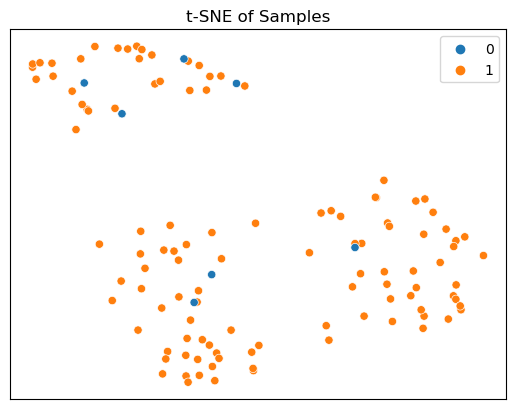

In [71]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_top)

sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=true_labels)
plt.title("t-SNE of Samples")
plt.xticks([])
plt.yticks([])
plt.show()


In [72]:
data_norm = (data - data.mean()) / data.std()


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(clf, data_top, true_labels, cv=5)
print(f"Accuracy: {scores.mean():.2f}")


Accuracy: 0.94


In [74]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming `data_top` is your filtered gene expression data
# and `true_labels` is your PD (1) / Control (0) list

# Train/test split (optional, or use all data)
X_train, X_test, y_train, y_test = train_test_split(data_top, true_labels, test_size=0.2, random_state=42)

# Train RF
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_
genes = data_top.columns

# Put in DataFrame and sort
gene_importance_df = pd.DataFrame({'Gene': genes, 'Importance': importances})
gene_importance_df = gene_importance_df.sort_values(by='Importance', ascending=False)

# Show top 20 genes
print(gene_importance_df.head(20))


              Gene  Importance
81        Gene_871    0.046602
12       Gene_9173    0.045814
29      Gene_57030    0.036762
99     Gene_114824    0.034736
80      Gene_90665    0.028100
76  Gene_102723506    0.026581
61     Gene_646951    0.024206
30       Gene_1103    0.024029
27      Gene_91807    0.023476
75     Gene_650226    0.022618
69       Gene_3043    0.022441
16      Gene_60482    0.021939
82  Gene_100507412    0.021162
10       Gene_3310    0.020840
13      Gene_22829    0.020742
70     Gene_170692    0.018753
97       Gene_3304    0.018320
96       Gene_5100    0.018084
21  Gene_102723630    0.017035
51     Gene_431707    0.016328


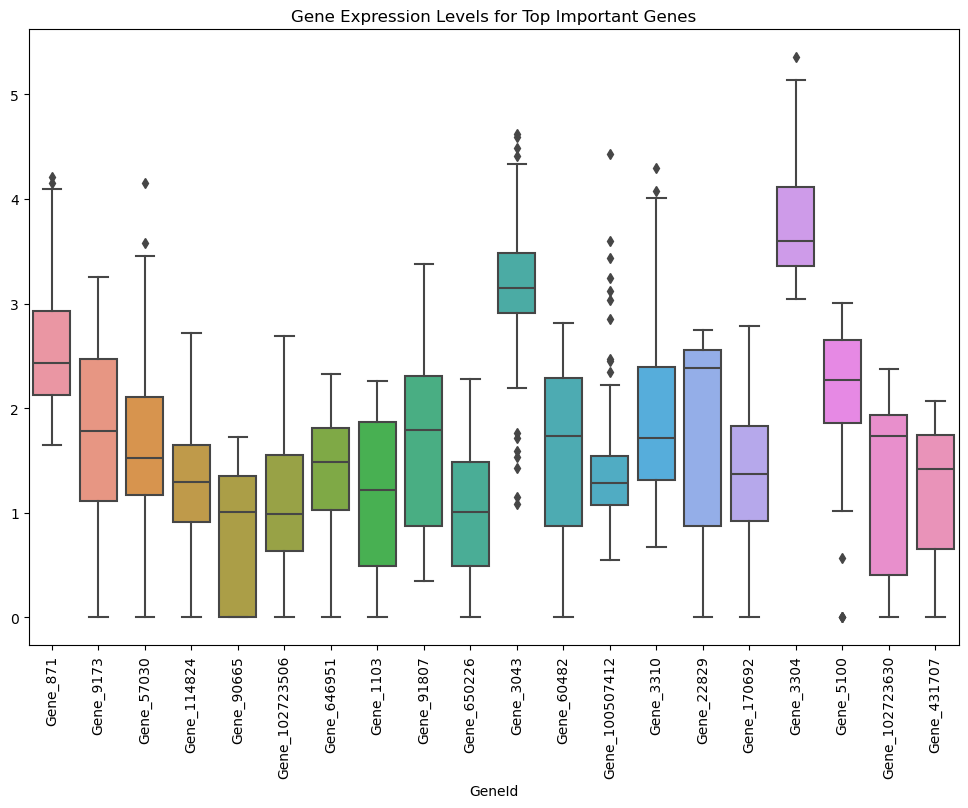

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is in `data_top` and gene list is `important_genes`
important_genes = [
    "Gene_871", "Gene_9173", "Gene_57030", "Gene_114824", "Gene_90665",
    "Gene_102723506", "Gene_646951", "Gene_1103", "Gene_91807", "Gene_650226",
    "Gene_3043", "Gene_60482", "Gene_100507412", "Gene_3310", "Gene_22829",
    "Gene_170692", "Gene_3304", "Gene_5100", "Gene_102723630", "Gene_431707"
]

# Filter out the genes
data_important = data[important_genes]

# Plot expression distribution for each gene
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_important)
plt.title('Gene Expression Levels for Top Important Genes')
plt.xticks(rotation=90)
plt.show()


In [76]:
important_genes = [
    "Gene_871", "Gene_9173", "Gene_57030", "Gene_114824", "Gene_90665",
    "Gene_102723506", "Gene_646951", "Gene_1103", "Gene_91807", "Gene_650226",
    "Gene_3043", "Gene_60482", "Gene_100507412", "Gene_3310", "Gene_22829",
    "Gene_170692", "Gene_3304", "Gene_5100", "Gene_102723630", "Gene_431707"
]


In [84]:
import gseapy as gs

# Run Enrichr
enr = gs.enrichr(gene_list=important_genes, gene_sets='KEGG_2016', outdir='enrichr_results', cutoff=100)
#enr = gs.enrichr(gene_list=important_genes, gene_sets='Reactome_2016', outdir='enrichr_results', cutoff=0.1)

# View top pathways
enr.res2d.head()


ValueError: Warning: No enrich terms when cutoff = 100

In [ ]:
enr.plot(bar=True, title='Pathway Enrichment')
plt.show()

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [91]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load your data
# Let's assume `df` is your original DataFrame with gene columns and a 'label' column (1 = PD, 0 = control)

# Example:
# df = pd.read_csv("your_gene_data.csv") # Your full expression data with labels

# Step 2: Split into features and target
X = data.drop(columns=['disease'])  # 'label' should be your diagnosis column
y = data['disease']

# Step 3: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 5: Logistic Regression with L1
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

# Step 6: Get feature importances
# ⚠️ Make sure you use original feature names
gene_names = X.columns  # This only works if X was a DataFrame
importance = pd.Series(model.coef_[0], index=gene_names).sort_values(ascending=False)
print(importance.head(20))


GeneId
Gene_92283        0.682063
Gene_100134868    0.590907
Gene_23248        0.586574
Gene_51129        0.250336
Gene_100506680    0.233294
Gene_101927720    0.222698
Gene_55066        0.193432
Gene_6967         0.191686
Gene_54974        0.185878
Gene_22982        0.151049
Gene_284800       0.148846
Gene_55145        0.147480
Gene_285          0.137895
Gene_688          0.117488
Gene_23516        0.095050
Gene_148932       0.094126
Gene_9730         0.091331
Gene_102724951    0.085228
Gene_11216        0.077939
Gene_26253        0.075828
dtype: float64
